# Who Texted Me?

Welcome to my *Who Texted Me?* project! I will be using Python to analyze my text messages.

I have divided this project into three parts, each of which has different goals:

1. Create a bar graph illustrating the most frequently contacted (via text) overall.

2. Create a racing bar chart to animate the most frequently contacted (via text) over time.

3. Build a decision tree model to predict the contact based on select variables.

# Part One: Most Frequently Contacted Overall

In [277]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sqlite3
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import bar_chart_race as bcr

The next two cells contain code from https://towardsdatascience.com/heres-how-you-can-access-your-entire-imessage-history-on-your-mac-f8878276c6e9. I changed the code accordingly to connect to the database containing my own text messages.

In [278]:
conn = sqlite3.connect('/Users/linhpham/Desktop/chat.db') # connect to the database
cur = conn.cursor() # get the names of the tables in the database
cur.execute(" select name from sqlite_master where type = 'table' ")
for name in cur.fetchall():
    print(name)

('_SqliteDatabaseProperties',)
('deleted_messages',)
('sqlite_sequence',)
('chat_handle_join',)
('sync_deleted_messages',)
('message_processing_task',)
('handle',)
('sync_deleted_chats',)
('message_attachment_join',)
('sync_deleted_attachments',)
('kvtable',)
('chat_message_join',)
('message',)
('chat',)
('attachment',)
('sqlite_stat1',)


In [279]:
df = pd.read_sql_query("select * from message limit 500000", conn) # create a dataframe containing all text messages and relevant information
df.sample(10, random_state=420)

,ROWID,guid,text,replace,service_center,handle_id,subject,country,attributedBody,version,...,reply_to_guid,sort_id,is_spam,has_unseen_mention,thread_originator_guid,thread_originator_part,syndication_ranges,was_delivered_quietly,did_notify_recipient,synced_syndication_ranges
122453,141249,E3A60C45-09F5-4A1A-A05B-EF35D218CB4E,LMAO I DIDN”T MEAN FOR IT TO SOUND LIKE THAT T^T,0,None,183,None,None,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,10,...,None,0,0,0,None,None,None,0,0,None
219699,240956,11D8ED14-B5F6-4EE3-8773-14FF8B113A40,Hello,0,None,4,None,None,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,10,...,None,0,0,0,None,None,None,0,0,None
326684,348493,3B12E9E3-BC6B-1FBA-BE8B-60B4242A598C,This is so sad I ordered food and it tastes li...,0,None,69,None,None,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,10,...,3D446A99-8FA7-4E1A-B9C5-814FEA31E4AE,0,0,0,None,None,None,0,0,None
328474,350295,6AC0596D-7123-4F27-AED0-1BC021E72BD0,nyc so expensive tho,0,None,4,None,None,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,10,...,None,0,0,0,None,None,None,0,0,None
209828,230958,1D929356-FC97-416A-B148-5A956C0DE609,HAHAHAHAHAHA,0,None,0,None,None,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,10,...,None,0,0,0,None,None,None,0,0,None
35531,47549,FBCEDF6C-3775-42A7-ABEA-A556AB69406C,Same thing,0,None,4,None,None,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,10,...,None,0,0,0,None,None,None,0,0,None
291720,313429,C37D3D06-3D7D-4AA3-B238-A7290F597B2C,Hahahaha,0,None,4,None,None,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,10,...,021CC21F-C98E-4971-9447-593CB15AEF5E,0,0,0,None,None,None,0,0,None
349467,371467,5507C43C-746E-475E-B2E2-F192340E57AC,LMAO goodbye,0,None,535,None,None,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,10,...,None,0,0,0,None,None,None,1,0,None
126598,145412,B819308E-9853-4130-BDA3-6B5E731CF7E4,Liked “Seems cool”,0,None,179,None,None,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,10,...,None,0,0,0,None,None,None,0,0,None
104611,123195,74EA1584-7B8B-40E5-9D3C-9765B1EAB4E3,???,0,None,69,None,None,b'\x04\x0bstreamtyped\x81\xe8\x03\x84\x01@\x84...,10,...,None,0,0,0,None,None,None,0,0,None


This DataFrame has 78 columns. Let's see what they are.

In [280]:
df.columns

Index(['ROWID', 'guid', 'text', 'replace', 'service_center', 'handle_id',
       'subject', 'country', 'attributedBody', 'version', 'type', 'service',
       'account', 'account_guid', 'error', 'date', 'date_read',
       'date_delivered', 'is_delivered', 'is_finished', 'is_emote',
       'is_from_me', 'is_empty', 'is_delayed', 'is_auto_reply', 'is_prepared',
       'is_read', 'is_system_message', 'is_sent', 'has_dd_results',
       'is_service_message', 'is_forward', 'was_downgraded', 'is_archive',
       'cache_has_attachments', 'cache_roomnames', 'was_data_detected',
       'was_deduplicated', 'is_audio_message', 'is_played', 'date_played',
       'item_type', 'other_handle', 'group_title', 'group_action_type',
       'share_status', 'share_direction', 'is_expirable', 'expire_state',
       'message_action_type', 'message_source', 'associated_message_guid',
       'associated_message_type', 'balloon_bundle_id', 'payload_data',
       'expressive_send_style_id', 'associated_message_r

After scoping the data, I learned that *handle_id* is a unique integer assigned to each contact. With this in mind, I have created a new DataFrame containing select variables.

In [281]:
df = df[["handle_id", "text", "date", "service", "is_from_me", "is_read", "was_delivered_quietly"]] # select relevant columns
df.sample(10, random_state=420)

,handle_id,text,date,service,is_from_me,is_read,was_delivered_quietly
122453,183,LMAO I DIDN”T MEAN FOR IT TO SOUND LIKE THAT T^T,608088188367513472,iMessage,0,1,0
219699,4,Hello,628577112587201152,iMessage,0,1,0
326684,69,This is so sad I ordered food and it tastes li...,660974445357012096,SMS,0,1,0
328474,4,nyc so expensive tho,661556589616791424,iMessage,1,0,0
209828,0,HAHAHAHAHAHA,627359513971331072,iMessage,1,0,0
35531,4,Same thing,583196399455716608,iMessage,0,1,0
291720,4,Hahahaha,644735255701506560,iMessage,0,1,0
349467,535,LMAO goodbye,667965706753652864,iMessage,1,0,1
126598,179,Liked “Seems cool”,608615954924671232,iMessage,0,1,0
104611,69,???,605990727518132736,SMS,1,0,0


Let's take a look at each column.

*handle_id:* unique integer assigned to each contact

*text:* string containing a preview of the text message

*date:* integer indicating time a text message was sent

*service:* two-level categorical variable indicating service used to deliver text message (iMessage or SMS)

*is_from_me:* integer indicating whether the text message was sent from me (1) or delivered to me (0)

*is_read:* integer indicating whether a text message was marked as read (1) or not (0); the recipient of the text message must send read receipts in order for a message to be marked as read

*was_delivered_quietly:* integer indicating whether a text message was delivered quietly (1) or not (0); the recipient of the text message must share focus status and silence their notifications in order for a message to be marked as delivered quietly

We have our DataFrame! Let's check for missing data.

In [282]:
df.isnull().sum() # check for null values

handle_id                   0
text                     3500
date                        0
service                     0
is_from_me                  0
is_read                     0
was_delivered_quietly       0
dtype: int64

There are a few thousand rows containing null values. Let's remove them.

In [283]:
df = df.dropna() # drop rows containing null values

Next, I created a dictionary matching *handle_id*s to corresponding contacts. This will be helpful for visualization purposes.

In [284]:
d = {
    3: "phuong l.",
    4: "xanh q.",
    7: "trang p.",
    9: "cindy b.",
    13: "jennifer b.",
    17: "xanh q.",
    28: "jennifer n.",
    44: "sue w.",
    48: "kristina r.",
    69: "armando r.",
    77: "norberto n.",
    83: "phuong l.",
    89: "trang p.",
    98: "john t.",
    103: "earl p.",
    108: "jennifer b.",
    154: "danielle b.",
    160: "cari l.",
    172: "whitney c.",
    173: "kelly l.",
    174: "nadine s.",
    175: "jenny l.",
    176: "miranda l.",
    177: "vy t.",
    178: "sydney n.",
    179: "sophia n.",
    180: "danielle h.",
    181: "tiffany n.",
    182: "katie r.",
    183: "brianna z.",
    186: "edgar m.",
    190: "edgar m.",
    191: "audrey s.",
    192: "huy n.",
    194: "audrey s.",
    195: "melody a.",
    196: "ashna p.",
    197: "whitney c.",
    198: "whitney c.",
    200: "jennifer b.",
    202: "melody a.",
    204: "tiffany n.",
    207: "ashna p.",
    238: "cristina l.",
    241: "raymond b.",
    260: "katie l.",
    261: "erika s.",
    268: "osazee o.",
    272: "erika s.",
    274: "whitney c.",
    286: "huy n.",
    289: "earl p.",
    294: "andrew l.",
    310: "osazee o.",
    323: "aimee s.",
    334: "mom",
    338: "anthony m.",
    340: "sydney n.",
    351: "brianna z.",
    356: "daena mae c.",
    357: "alyssa m.",
    370: "denzel ryan c.",
    380: "sydney's cousin",
    393: "claren d.",
    394: "sani k.",
    395: "jia s.",
    397: "feon w.",
    419: "katelyn p.",
    420: "katelyn p.",
    423: "mom",
    477: "gina g.",
    485: "whitney c.",
    486: "amber b.",
    487: "malia s.",
    493: "mia c.",
    494: "evelyn c.",
    500: "wendy r.",
    501: "kimberly w.",
    505: "alexis louise m.",
    511: "william p.",
    514: "kelly y.",
    521: "alexander s.",
    535: "jasmine y.",
    540: "esther k.",
    536: "divya j.",
    545: "ethan w.",
    546: "joseph c.",
    551: "henry n.",
    557: "henry n.",
    559: "anthony m."
    } # create a dictionary assigning handle ids to contacts

Let's create a new column containing contact names and drop the rows with null values.

In [285]:
df["contact"] = df.handle_id.map(d) # create a new column in the dataframe containing names of contacts
df.isnull().sum() # check for null values

handle_id                   0
text                        0
date                        0
service                     0
is_from_me                  0
is_read                     0
was_delivered_quietly       0
contact                  4984
dtype: int64

In [286]:
df = df.dropna() # drop rows containing null values

Great, let's make our bar graph!

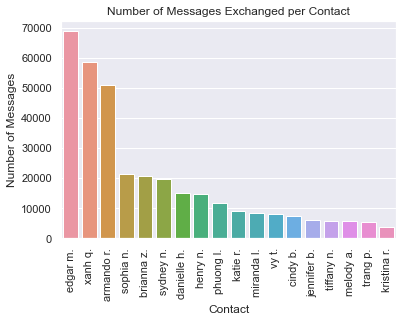

In [287]:
contact_count = df["contact"].value_counts().head(18) # select top 18 contacts
sns.barplot(x=contact_count.index, y=contact_count) # set x and y axes
plt.title("Number of Messages Exchanged per Contact") # set title
plt.xlabel("Contact") # label x axis
plt.ylabel("Number of Messages") # label y axis
plt.xticks(rotation=90) # rotate contacts' names
plt.show()

# Part Two: Most Frequently Contacted over Time

In order to animate a racing bar chart, we need to create a DataFrame indexed by date and set columns as names of contacts. For this part, I am going to work with 10,000 of the most recent text messages.

In [288]:
df_tail = df.tail(10000) # select 10,000 of the most recent text messages
bar_df = pd.DataFrame(index=df_tail.date, columns=set(d.values())) # index by date and set columns as names contacts
bar_df = bar_df.fillna(0) # change null (all) values to 0
bar_df

,xanh q.,norberto n.,esther k.,amber b.,denzel ryan c.,kelly l.,katie r.,jasmine y.,katie l.,aimee s.,...,william p.,daena mae c.,kimberly w.,wendy r.,armando r.,melody a.,mom,trang p.,whitney c.,miranda l.
date,,,,,,,,,,,,,,,,,,,,,
670912827267421056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
670912830151134976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
670912837643822976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
670912843267901440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
670912844101644032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673057184144646912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
673057192640604288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
673057335334087808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, we need to count the number of messages a contact has sent or received by a certain date. All other values have been set to 0.

In [290]:
count_d = {}
for df_date in df_tail.date:
    for name in bar_df.columns:
        for boolean in df_tail[df_tail.date == df_date].contact == name:
            if boolean == True:
                if count_d.get(name) == None:
                    count_d[name] = 1
                    bar_df.loc[bar_df.index == df_date, name] = count_d[name]
                else:
                    count_d[name] += 1
                    bar_df.loc[bar_df.index == df_date, name] = count_d[name]
            else:
                if count_d.get(name) == None:
                    bar_df.loc[bar_df.index == df_date, name] = 0
                else:
                    bar_df.loc[bar_df.index == df_date, name] = count_d[name]
bar_df # change values in dataframe to indicate who (is) contacted and nth time contacting

,xanh q.,norberto n.,esther k.,amber b.,denzel ryan c.,kelly l.,katie r.,jasmine y.,katie l.,aimee s.,...,william p.,daena mae c.,kimberly w.,wendy r.,armando r.,melody a.,mom,trang p.,whitney c.,miranda l.
date,,,,,,,,,,,,,,,,,,,,,
670912827267421056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
670912830151134976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
670912837643822976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
670912843267901440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
670912844101644032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673057184144646912,0,0,0,3,0,3,76,486,0,0,...,0,0,0,0,1278,3,0,0,0,63
673057192640604288,0,0,0,3,0,3,76,486,0,0,...,0,0,0,0,1278,3,0,0,0,63
673057335334087808,0,0,0,3,0,3,76,486,0,0,...,0,0,0,0,1278,3,0,0,0,63


Great, let's make the bar chart race!

In [291]:
bcr.bar_chart_race(
    df=bar_df,
    filename="who-texted-me.mp4", # name the file
    n_bars=10, # set number of bars
    cmap="Pastel1", # change colors of bars
    title="Number of Messages Exchanged per Contact over Time" # set title
)

/Users/linhpham/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/linhpham/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/linhpham/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/linhpham/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/linhpham/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/linhpham/opt/anaconda3/lib/python3.8/site-packages/ma

# Part Three: Predicting Texters

In order to build a decision tree model, we need to one-hot encode relevant categorical variables and drop irrelevant variables.

In [300]:
df1 = df.copy()
df1 = df1.drop("contact", axis=1) # drop "contact" column
df1.sample(10, random_state=69)

,handle_id,text,date,service,is_from_me,is_read,was_delivered_quietly
101507,174,Guys I made a new one,605470481688493696,iMessage,0,1,0
255099,186,LMAO,634593793047688704,iMessage,1,1,0
183352,180,At socials 🤡,623298034838519552,iMessage,0,1,0
241503,182,jk i got 36 LOL,632355010328832128,iMessage,0,1,0
112739,182,why doesit look weird,607072716058756608,iMessage,0,1,0
108074,192,;_;,606711957278640000,iMessage,0,1,0
4998,4,how was your 18th birthday,566806794627829568,iMessage,1,1,0
98613,180,i feel like thats kinda what happened w jenny,605049565918238464,iMessage,0,1,0
365430,551,well,671001741796905216,iMessage,1,0,1
360368,178,okok,670106175858206464,iMessage,1,0,0


In [301]:
df1.service.unique() # display unique values of "service" variable

array(['iMessage', 'SMS'], dtype=object)

In [302]:
df1["service"] = df1.service.map({"iMessage":1, "SMS":0}) # one-hot encoding

df1 = df1.drop("text", axis=1) # drop "text" column
df1

,handle_id,date,service,is_from_me,is_read,was_delivered_quietly
0,3,564970350830736896,1,1,0,0
1,4,564970429578646912,1,1,1,0
2,4,564970475942748288,1,1,1,0
3,4,564971101607219456,1,1,1,0
4,4,564971820252276416,1,1,1,0
...,...,...,...,...,...,...
374835,186,673057184144646912,1,1,0,0
374836,186,673057192640604288,1,1,1,0
374837,186,673057335334087808,1,0,1,1
374838,186,673057337476038912,1,0,1,1


Let's build and test our model!

In [303]:
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,1:], df1.handle_id, train_size=.9, random_state=420) # split the data into training and testing sets

model = tree.DecisionTreeClassifier() # create the model
model.fit(X_train, y_train) # fit the model

predictions = model.predict(X_test) #predict

accuracy_score(y_test, predictions), metrics.cohen_kappa_score(y_test, predictions) # display accuracy and kappa score

(0.8155912217490993, 0.7955095278983976)

The model has an accuracy score of .81 and a Kappa score of .79, indicating fair performance.

Let's create a DataFrame containing both the labels and predictions.

In [304]:
pred_df = pd.DataFrame(y_test) # label
pred_df = pd.concat([X_test, pred_df], axis=1) # features
pred_df["predictions"] = predictions # add "predictions" column containing predictions
pred_df

,date,service,is_from_me,is_read,was_delivered_quietly,handle_id,predictions
50033,589568477551762048,1,0,1,0,4,4
79238,598578855279642880,1,1,0,0,195,195
327354,661304750685722368,1,0,1,0,511,511
6357,567407269730572672,1,1,1,0,4,4
46829,588293492331537024,1,0,1,0,4,4
...,...,...,...,...,...,...,...
11341,569466877096841088,1,0,1,0,28,28
95607,604712802257502848,1,0,1,0,182,179
170890,621454290609179776,1,1,1,0,186,186
283928,641617978200946304,1,0,1,0,186,186


As expected, many of the labels and predictions match.

# Conclusion

I managed to complete all three of my goals: determine the most frequently contacted overall and over time; and predict texters based on select variables!

What's particularly interesting is my decision tree model's accuracy and Kappa scores, which are relatively high. However, the model’s biggest flaw is that the training data only contains information from the past, and its performance will not be as strong for new data. It will fail to predict new, unknown contacts. It may even be a struggle to predict current contacts for messages sent after the model was created. The model would need to constantly feed on (and favor) new data to maintain its performance.